### Linear Regression - Mileage Prediction

#### Objective: Predict the "Mileage" of Cars based on different Predictors using Linear Regression ML Algorithm
##### Dataset: mtcars


In [154]:
# Import all the necessary required modules

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sb
from scipy import stats
import numpy as np

In [155]:
# Import the 'mtcars' dataset --> mtcars.csv

data = pd.read_csv('mtcars.csv')

In [156]:
# Displays the first five observations in mtcars dataset

data.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [157]:
# Fetches the count of rows and columns in mtcars dataset

data.shape

(32, 12)

(32, 12) = 32 Observations(Rows) and 12 Characteristics(Columns)

In [158]:
# Linear Regression is used to predict the 'mpg'(Mileage) == y
# Using the predictors like 'hp'(Horse Power), 'wt'(Weight), 'am'(Auto-Manual) == X

# Checking for Normality Test for all the predictors
print("Range of SKEWNESS and KURTOSIS to be between -1 and +1 for all the Predictors")

# Measure of Skewness
print("Skewness of 'hp': ", stats.skew(data.hp))
print("Skewness of 'wt': ", stats.skew(data.wt))

# Measure of Kurtosis
print("Kurtosis of 'hp': ", stats.kurtosis(data.hp))
print("Kurtosis of 'wt': ", stats.kurtosis(data.wt))

Range of SKEWNESS and KURTOSIS to be between -1 and +1 for all the Predictors
Skewness of 'hp':  0.8824486686403539
Skewness of 'wt':  0.45340839946604955
Kurtosis of 'hp':  0.2164779989409764
Kurtosis of 'wt':  0.04845108327092662


Predictors passes the Normality Tests as they are all within the range between -1 and +1

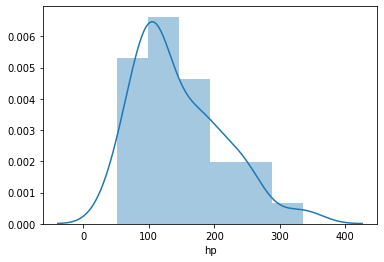

In [159]:
# Visually respresenting this for 'hp'
%matplotlib inline
sb.distplot(data.hp);

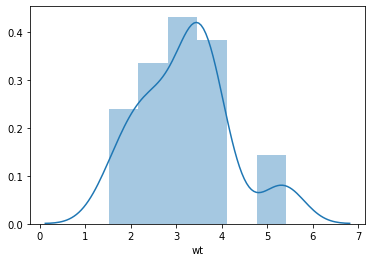

In [160]:
# Visually respresenting this for 'wt'
%matplotlib inline
sb.distplot(data.wt);

In [161]:
# Declaring the Predictors and Target variables

X = data.loc[:,['hp', 'wt']]
y = data.mpg

In [162]:
# Splitting the dataset into Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=14)

In [163]:
# Verify the shape(number of records) after split

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("y_train shape:", y_train.shape)
print("y_train shape:", y_test.shape)

X_train shape: (27, 2)
X_test shape: (5, 2)
y_train shape: (27,)
y_train shape: (5,)


From the above observation, no of records used for(dataset divided into):
* X_train = 25
* y_train = 25
---------------
* X_test = 7
* y_test = 7

In [164]:
# Defining the Linear Regression Model
model = LinearRegression()

In [165]:
# By passing the X, y train data fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The model is now trained

In [166]:
# Predict y (mpg) by passing the X_test
y_predict = model.predict(X_test)

In [167]:
# Estimating the accuracy of the model using 'r2 score'
r2_score(y_test, y_predict)*100

52.95895939280373

Model is around 60% accurate which is fair but not great enough

In [168]:
# Comparing the y_test (test set data) with that of the data predicted by model y_predict
y_test.head(), y_predict[0:5]

(2     22.8
 29    19.7
 27    30.4
 19    33.9
 3     21.4
 Name: mpg, dtype: float64,
 array([24.11119212, 20.35522396, 26.51193374, 26.59251409, 20.43193186]))

### Optimization of Linear Regression ML model

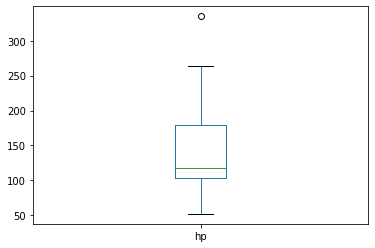

In [169]:
# Check for Outliers
data.hp.plot(kind='box');

We can clearly see an outlier which needs to be treated

In [170]:
# Find out the maximum value causing it to be outlied
print("Max 'hp':", data.hp.max())

data[data.hp == data.hp.max()]

Max 'hp': 335


,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


In [171]:
# Shape of dataset before outlier removal
data.shape

(32, 12)

In [172]:
# Dropping the outlier record from the dataset
data_without_outlier = data.drop(index=30)

In [173]:
# Shape of dataset after outlier removal - new updated dataset named 'data_without_outlier'
data_without_outlier.shape

(31, 12)

Use this new dataset 'data_without_outlier' to achieve the better accuracy, which is as a part of model optimization technique

In [174]:
# Run the entire model again with new updated dataset after removal of the outlier

# Declaring the Predictors and Targets
X = data_without_outlier.loc[:,['hp', 'wt']]
y = data_without_outlier.mpg

# Split the new updated dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=14)

# Defining the Model
model = LinearRegression()

# Fitting the Model
model.fit(X_train, y_train)

# Perform prediction
y_predict = model.predict(X_test)

# Measure the accuracy
r2_score(y_test, y_predict)*100

95.51495767510984

After the removal of the oulier our optimization technique worked. As we can see the model is with a very accuracy score of 95.5%

In [175]:
y_test

2     22.8
18    30.4
15    10.4
3     21.4
26    26.0
Name: mpg, dtype: float64

In [176]:
y_predict

array([24.90532224, 29.00869139,  8.63949772, 20.7746142 , 25.69241444])

Comparing the values of y_test and y_predict they both are alomost closer !!

In [194]:
model.predict([[110, 3.2]])

array([20.83507661])